# Networking for Big Data - Assigment #1
# Faranak Alikhah - Mehrdad Hassanzadeh - Behdad Ahmadi- Braulio Villalobos

#### Import Libraries

In [46]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.linalg import eig
import fnss
import random 
from math import ceil
import matplotlib.pyplot as plt
import datetime

## 1st Part 

#### Generation of ER Graphs

In [47]:
def er_graph_f(num_nodes, prob,show_graph = True):
    '''
    This function builds the ER Graph by using the networkx library. 
    
    Parameters: 
    num_nodes -> Total number of nodes in the graph 
    prob -> The probability that each edge is included in the graph independently from other edges
    show_graph -> If set to 'True' a visualization of the resulting graph will be shown
    
    Outputs: 
    G -> The generated ER-graph as an object of nx
    
    '''
    
    # The graph will be built by using the specific function in nx 
    G = nx.erdos_renyi_graph(num_nodes,prob)
    
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
        
    return G

#### Generation of r-regular random graph

In [49]:
def rr_graph_f(d,n,seed_par = None,show_graph=False):
    '''
    This function builds the Random Regular graph by using the networkx library. 
    
    Parameters:
    d -> The degree of each node in the graph
    n -> Total number of nodes in the graph.THe corresponds to the number of nodes (n x d must ve even)
    seed_par -> Related to the seed to be used in generating random numbers
    show_graph -> If set to 'True' a visualization of the resulting graph will be shown
    Note!!!: In R-regular graph, the n x d most be even, otherwise it's not possible to build the graph
    
    Outputs: 
    G -> The generated R-regular graph as an object of nx

    '''
    # The graph will be built by using the specific function in nx
    G = nx.random_regular_graph(d, n, seed=seed_par)
    
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
        
    return G

## Methods to Check Connectivity

### A) Breadth-First-Search Algorithm 

In [51]:
def Check_connectivity_BFS(Graph):
    '''
    This function given a graph will check if the graph is connected or not by using the 
    BFS algorithm. 
    
    Parameters: 
    Graph -> The graph that we want to check its connectivity
    
    Outputs: 
    A boolean value. 'True' corresponds to the connectivity of the graph and 'False' otherwise
    
    '''
    #
    Nodes = list(nx.nodes(Graph))
    visited = set()
    BFS_queue = [Nodes[0]]
    while BFS_queue: 
        Target_node = BFS_queue.pop(0)
        if Target_node not in visited: 
            visited.add(Target_node)
            BFS_queue += list(nx.neighbors(Graph, Target_node))
            
    return True if len(visited) == len(list(nx.nodes(Graph))) else False 

### B) Irreducibility

In [54]:
def Check_irreducibility(Graph): 
    '''
    This function given a graph, checks if the adjacency matrix of the graph is 
    irreducible or not. 
    
    Parameters: 
    Graph -> The graph that we want to check 
    
    Outputs: 
    A boolean value. 'True' corresponds to that the adjacency matrix of the graph is irreducible
    and 'False' otherwise
    '''
    Num_of_nodes = nx.number_of_nodes(Graph) # To get the number of the nodes in the given graph 
    Result = np.identity(Num_of_nodes) # To build the identity matrix in the same size of the graph 
    Adjacency_matrix = nx.to_numpy_array(Graph) # To have the adjacency matrix of the given graph 
    
    # Temporary result of I + A at the moment by at the end will include the final resulted matrix
    Result += Adjacency_matrix 
    
    # To have the adjacency matrix of the graph
    Temp = Adjacency_matrix.copy()
    
    for i in range(Num_of_nodes - 2): # Range to A^n-1
        Adjacency_matrix *= Temp
        Result += Adjacency_matrix
        
    # If all the values in the resulting matrix are positive then the matrix is irreducible
    return False if (Result <= 0 ).any() else True

### C) Eigenvalue of the Laplacian Matrix

We define the Laplacian of a graph as a $n x n$ matrix, which is defined as follows:

* $L_{ii}$ = $d_i$, where $d_i$ is the degree of node $i$
* $L_{ij}$ = -1, if and only if $(i,j) \in A$

We can also get the Laplacian Matrix through the following: 

$L = D - A$

Where
* $D$ is the degree matrix
* $A$ is the adjacency matrix

In [57]:
def adj_matrix_f(G):
    '''
    This function given a graph, will return the adjacency matrix of it 
    
    Parameters: 
    G -> The graph which we want to get its adjacency matrix
    
    Output: 
    A matrix representing the adjacency matrix of the given graph
    '''
    
    node_list = sorted([x for x in G.nodes()])
    
    return(nx.adjacency_matrix(G, nodelist=node_list))

In [58]:
def degree_matrix(adj_matrix):
    '''
    This function given an adjacency matrix of a graph, will produce the degree matrix of the grpah
    which has in its diagonal the total number of edges connected to each node in the graph. 
    
    Parameters 
    adj_matrix -> A matrix that represents the adjacency matrix of a graph 
    
    Outputs: 
    dim -> The degree matrix of the graph that its adjacency matrix was given to the function
    '''
    
    degree_matrix = np.zeros([adj_matrix.shape[0], adj_matrix.shape[0]]) 
    rows, cols = adj_matrix.nonzero()
    for row, col in zip(rows, cols):
        degree_matrix[row, row] += 1
        
    return degree_matrix

In [59]:
def laplacian_matrix(G):
    '''
    This function give a graph, produces the Laplacian matrix of the graph. 
    
    Parameters: 
    G -> A graph which is an object of the nx.
    
    Outputs: 
    L -> The laplacian matrix of the given graph. 
    '''
    
    A = adj_matrix_f(G)
    D = degree_matrix(A)
    L = D-A
    
    return(L.astype(int))

In [60]:
def eing_values(l_matrix):
    '''
    This function give a laplacian matrix, produces its eigenvalues and eigenvectors. 
    
    Parameters: 
    l_matrix -> A laplacian matrix of a graph 
    
    Outputs: 
    w -> The eigenvalues of the given laplacian matrix of a graph 
    '''
    
    # The eigenvalues and eigenvectors are being computed using 'eig' function in numpy.linalg module
    w,v=eig(l_matrix)
    
    return w

In [61]:
def check_connectivity_laplacian(G):
    '''
    This function given a graph will check if the graph is connected or not through 
    the eigenvalues of the Laplacian Matrix of the given graph. 
    
    Parameters: 
    G -> A graph which is an object of the nx.
    
    Outputs: 
    A boolean value. 'True' corresponds to that the adjacency matrix of the graph is irreducible
    and 'False' otherwise
    '''
    
    # Producing the laplacian matrix of the given graph
    laplac_matrix = laplacian_matrix(G)
    
    # Computing the eigenvalues of the given laplacian matrix of the graph 
    eig_val = eing_values(laplac_matrix)
    
    
    return(True if (sorted(list(eig_val))[1]) > 0 else Flase)

## Comparing the time complexity of the three methods 

Here we are running __n different simulations__ over __different k (number of nodes)__ with __fixed r = 4__ and reporting the averaged required time for the three methods (__BFS, Laplacian Matrix and Eigenvalue of the Laplacian Matrix__) to check the connectivity of the constructed R-regular graph. 

In [63]:
%%time
'''
Random experiment to estimate and compare the mean complexity of the three methods (BFS, Laplacian & Irreducibility)
used to test the connectivity of a given graph. 
'''

#Define n, which is the number of simulations run for each value of k
n = 1

#Different number of K (nodes) to test the complexity
k_list = list(range(20, 500))

#Vectors to store complexity of Laplacian Matrix for different values of k
vec_laplacian_k = np.zeros(len(k_list))
vec_irreducible_matrix_k = np.zeros(len(k_list))
vec_bfs_k = np.zeros(len(k_list))

# Ranging over different values of k
for k in k_list:
    
    # Vectors to store required time for the n different simulations with each k
    vec_laplacian_sim = np.zeros(n)
    vec_bfs_sim = np.zeros(n)
    vec_irreducible_matrix_sim = np.zeros(n)
    
    # Number of the simulations
    for i in range(0,n):
        
        #Creation of R-regular graph 
        r_graph = rr_graph_f(4, k)
    
        #******************* Laplacian Algorithm ********************
        
        # Start of the Laplacian test
        start_time = datetime.datetime.now()

        check_connectivity_laplacian(r_graph)

        end_time = datetime.datetime.now()
        # End of Laplacian test
        
        #Store the result of the Laplacian test
        time_diff = (end_time - start_time)
        execution_time = time_diff.total_seconds() * 1000
        vec_laplacian_sim[i] = execution_time

        
        #********************** BFS Algorithm ***********************
        
        # Start of the BFS test
        start_time = datetime.datetime.now()
        
        Check_connectivity_BFS(r_graph)
        
        end_time = datetime.datetime.now()
        # End of the BFS Test
        
        #Store the results of the BFS test
        time_diff = (end_time - start_time)
        execution_time = time_diff.total_seconds() * 1000
        vec_bfs_sim[i] = execution_time
        
        
        #************** Irreducible matrix Algorithm *****************
        
        # Start of the irreducible matrix test
        start_time = datetime.datetime.now()

        Check_irreducibility(r_graph)

        end_time = datetime.datetime.now()
        # End of the irreducible matrix test
        
        #Store the results of the Laplacian test
        time_diff = (end_time - start_time)
        execution_time = time_diff.total_seconds() * 1000
        vec_irreducible_matrix_sim[i] = execution_time
    
    
    # Storing average of the required time 
    # to check connectivity for n simulations with a fixed k
    vec_laplacian_k[ k - 20 ] = np.mean(vec_laplacian_sim)
    vec_bfs_k[k - 20] = np.mean(vec_bfs_sim)
    vec_irreducible_matrix_k[k - 20] = np.mean(vec_irreducible_matrix_sim)

CPU times: user 4min 52s, sys: 2.52 s, total: 4min 54s
Wall time: 5min 23s


Plotting the results regarding the time complexity of each of the three mentioned methods to check the connectivity of a R-regular graph. 

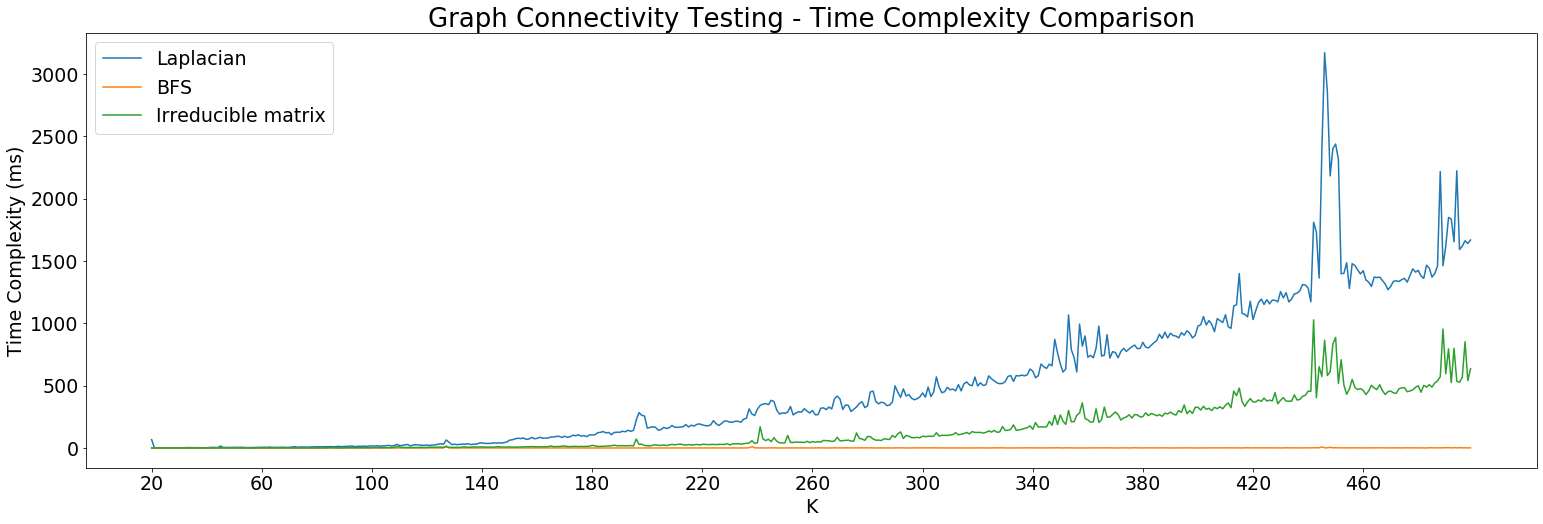

In [67]:
plt.rcParams["figure.figsize"] = (26, 8)
plt.plot(k_list, vec_laplacian_k,label = "Laplacian")
plt.plot(k_list, vec_bfs_k,label = "BFS")
plt.plot(k_list, vec_irreducible_matrix_k,label = "Irreducible matrix")
plt.title('Graph Connectivity Testing - Time Complexity Comparison', fontsize = 26)
plt.ylabel('Time Complexity (ms)', fontsize = 19)
plt.xlabel('K', fontsize = 19)
plt.legend(fontsize = 19)
plt.xticks(range(20, 500, 40), fontsize = 19)
plt.yticks(fontsize = 19)
plt.savefig('TimeComplexity.png')
plt.show()

In [ ]:
File = open('Three methods.txt', 'w')
File.write('Laplacian = '+ str(vec_laplacian_k)+'\n')
File.write('BFS = '+ str(vec_bfs_k)+'\n')
File.write('Irreducible = '+ str(vec_irreducible_matrix_k)+'\n')
File.write('k_list = ', str(k_list))
File.close()

## ER Graphs - Monte Carlo Simulations

In [33]:
def er_monte_carlo_sim(K=100, M=150):
    '''
    Function that runs a Monte Carlo Simulation for ER Graphs
        * K parameter corresponds to the number of nodes. It is set by default to 100, as required by the homework. 
        * M parameter corresponds to the number of simulations to be run for each value of p. It is set by default to 150.
    '''
    
    # Create the counter to store how many random graphs, of the total run simulations, are connected, in order to estimate the probability.
    counter = 0 

    # Create the vector of different p's that will be tested. 
    # Define a step to breakdown the probability space
    step = 0.01
    # Create a vector for the different values of p for which we will run simulations. Is the 0-1 interval broken down by the value of "step"
    p_vector = np.arange(0.0, 1.001, step)

    #Create the vector to store the estimated probability, for each value of p, obtained after the M simulations are run. 
    estim_prob = np.zeros(len(p_vector))

    #Value to iterate the estim_prob vector
    t=0
    #For each value of p, contained in p_vector, run simulations...
    for p in p_vector:
        #For a particular value of p, run M simulations...
        for i in range(0,M):
            #Create the ER Graph
            sim_er_graph = er_graph_f(K, p,show_graph = False)
            
            #If graph is connected, increase counter
            if Check_connectivity_BFS(sim_er_graph):
                counter += 1
        
        #Estimate and store the probability, based on the M simulations, for a particular value of p, by following the frequentist prob approach.  
        estim_prob[t] = counter/M
        #Reset counter
        counter = 0
        #Increase iterator of estim_prob vector
        t += 1
    
    return estim_prob, p_vector

In [34]:
res_simulation, p_vector = er_monte_carlo_sim(K=100, M=30000)
File = open('Final_Result_part1.txt', 'w')
File.write('ER graph = '+ str(res_simulation)+'\n')
File.write('ER graph - p_vector = ' + str(p_vector))
File.close()

KeyboardInterrupt: 

In [ ]:
plt.rcParams["figure.figsize"] = (26, 8)

# Find the point of p, which from that point the graph will be connected
Guarantee_point = 0 
Size = len(res_simulation)
for i in range(Size):
    if sum(res_simulation[i:])//(Size - i) == 1:
        Guarantee_point = i 
        break 
        
plt.plot(p_vector, res_simulation,label = "ER_graph", linewidth = 7, color = '#1e7d01')
plt.title('Propability of the connectivity of Erdos-Renyi graph (k = 100)', fontsize = 26)
plt.ylabel(r'$P_c (G)$', fontsize = 19)
plt.axhline(1, linestyle = '-.', color = 'orange', linewidth = 2, label = 'Connected_network')
plt.axvline(p_vector[Guarantee_point], linestyle = '-.', color = 'blue', linewidth = 2, 
            label = 'Guaranteed_connectivity_point = ' + str(p_vector[Guarantee_point]))

plt.xlabel('p', fontsize = 19)
plt.legend(fontsize = 19)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.savefig('Er-graph Pc vs p.png')
plt.show()

## R-Regular Random Graphs - Monte Carlo Simulations

In [35]:
def rr_monte_carlo_sim(d=2, n=100, M = 500):
    '''
    Function that runs a Monte Carlo Simulation for R-Regular Graphs
        * d parameter corresponds to the degree of each node
        * n parameter corresponds to the maximum number of nodes for which the simulations will be run
        * M parameter corresponds to the number of simulations that are run for each value of K. 
    (n*d) must be even. However this only becomes important for uneven values of d.
    '''
    # Create the counter to store how many random graphs, of the total run simulations, are connected, in order to estimate the probability.
    counter = 0 

    # Create the K-vector, which corresponds to a vector with values 
    k_vector = list(range(d+1,n+1))

    #Create the vector to store the estimated probability, for each value of p, obtained after the M simulations are run. 
    estim_prob_rr = np.zeros(len(k_vector))

    t = 0
    for k in k_vector: 
    
        for i in range(0,M):
            sim_r_regular_graph = rr_graph_f(d, k)
        
            #If graph is connected, increase counter
            if Check_connectivity_BFS(sim_r_regular_graph):
                counter += 1
    
        estim_prob_rr[t] = counter/M
        counter = 0
        t += 1
    
    return estim_prob_rr, k_vector

In [179]:
r_reg_simulation_1, k_vector_1 = rr_monte_carlo_sim(d = 2, n = 100, M = 1)
r_reg_simulation_2, k_vector_2 = rr_monte_carlo_sim(d = 8, n = 100, M = 1)
File = open('Final_Result_part2.txt', 'w')
File.write('R-regular (r = 2) = '+ str(r_reg_simulation_1)+'\n')
File.write('R-regular (r = 2) - k_vector = ' + str(k_vector_1))
File.write('R-regular (r = 8) = '+ str(r_reg_simulation_2)+'\n')
File.write('R-regular (r = 8) - k_vector = ' + str(k_vector_2))
File.close()

In [ ]:
plt.rcParams["figure.figsize"] = (26, 8)

plt.plot(k_vector_1, r_reg_simulation_1,label = "R-Regular graph (r = 2)", linewidth=3, color = '#1e7d01')
plt.plot(k_vector_2, r_reg_simulation_2,label = "R-Regular graph (r = 8)", linewidth=3, color = '#eb8334')
plt.title('Propability of the connectivity of R-Regular graph', fontsize = 26)
plt.ylabel(r'$P_c (G)$', fontsize = 19)
plt.xlabel('K', fontsize = 19)
plt.legend(fontsize = 19)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.savefig('R-Regular connectivity.png')
plt.show()

### Backup

In [ ]:
'''
Adjacency Matrix can also be retrieved with the following
'''

#ttt = nx.adjacency_matrix(z)
#print(ttt.todense())

In [ ]:
node_list = sorted([x for x in z.nodes()])
xxx = nx.laplacian_matrix(z, nodelist=node_list)

print(xxx.todense())

# Part 2

In [36]:
def BFS_connected_component(Graph, Unvisited): 
    visited = set()
    BFS_queue = random.sample(Unvisited, 1)
    while BFS_queue: 
        Target_node = BFS_queue.pop(0)
        if Target_node not in visited: 
            visited.add(Target_node)
            BFS_queue += list(nx.neighbors(Graph, Target_node))
    return visited 

In [37]:
def Check_largest_connected_component(Graph): 
    Nodes = set(list(nx.nodes(Graph)))
    Component_size = []
    while Nodes: 
        Nodes_in_connected_component = BFS_connected_component(Graph, Nodes)
        Component_size.append(len(Nodes_in_connected_component))
        Nodes -= Nodes_in_connected_component
    return max(Component_size)

In [38]:
def Calculate_PC(Graph): 
    return Check_largest_connected_component(Graph)/len(list(nx.nodes(Graph)))

## Building a fat_tree topology 

In [ ]:
Fat_tree_graph = nx.Graph(fnss.fat_tree_topology(k=4))

## Removing the servers from Fat_tree

As in the question we were asked to consider the topology just among the switches (not the servers included), we have remove the servers from the topollgy

In [39]:
def Remove_servers(Graph):
    All_nodes = nx.nodes(Graph)
    Servers = []
    for node in All_nodes:
        if len(list(nx.neighbors(Graph, node))) == 1:
            Servers += [node]
    Graph.remove_nodes_from(Servers)
    return Graph

In [ ]:
nx.to_numpy_array(Fat_tree_graph).sum()//2

Given n (number of ports in each switch), r = (4 * n) / 5 is the number of ports that should be allocated for interconnecting switches in the Jellyfish topology, in order to have the same #switches, #servers and #links (between the swithces) in both Jellyfish and Fat-tree topologies. 


__Here our given n is equal to '10' this result into r equal to '8'.__

In [40]:
def Remove_edges(Graph, fraction): 
    Copy_Graph = Graph.copy()
    Number_of_edges_to_remove= ceil(len(nx.edges(Copy_Graph)) * fraction)
    Edges_to_remove = random.sample(set(nx.edges(Copy_Graph)), Number_of_edges_to_remove)
    Copy_Graph.remove_edges_from(Edges_to_remove)
    return Copy_Graph

In [61]:
fractions = np.linspace(0.02, 0.98, 20)

In [41]:
def PC_estimator(n, Graph_topo, fraction, num_sim):
   
    PCs = np.zeros(num_sim)
    
    for i in range(num_sim):
        
        if Graph_topo == 'Fat_tree': 
            
            Graph = nx.Graph(fnss.fat_tree_topology(k = n))
            Graph = Remove_servers(Graph)
        
        if Graph_topo == 'R_regular':
            
            # Number of port devoted to interconnectivity among switches
            r = (4 * n)//5
            
            # Number of switches
            S =  (5*(n**2))//4
            
            Graph = rr_graph_f(r, S)
            
        Graph = Remove_edges(Graph, fraction)
        PCs[i] = Calculate_PC(Graph)
    return PCs

In [42]:
def PC_simulation(n, Graph_topo, num_fractions, num_sim): 
    PCs_mean = np.zeros(num_fractions)
    Fractions = np.linspace(.02, .98, num_fractions)
    for i in range(len(Fractions)):
        PC_mean = PC_estimator(n, Graph_topo, Fractions[i], num_sim)
        PCs_mean[i] = PC_mean.mean()
    return PCs_mean, Fractions

In [43]:
%%time
Fat_tree = PC_simulation(10, 'Fat_tree', 80, 5000)
R_regular = PC_simulation(10, 'R_regular', 80, 5000)
File = open('Final_Result_part3.txt', 'w')
File.write('Fat_tree = '+ str(Fat_tree[0])+'\n')
File.write('R_regular = ' + str(R_regular[0])+'\n')
File.write('Fractions = ' + str(Fat_tree[1]))
File.close()

KeyboardInterrupt: 

Plotting the curves related to the

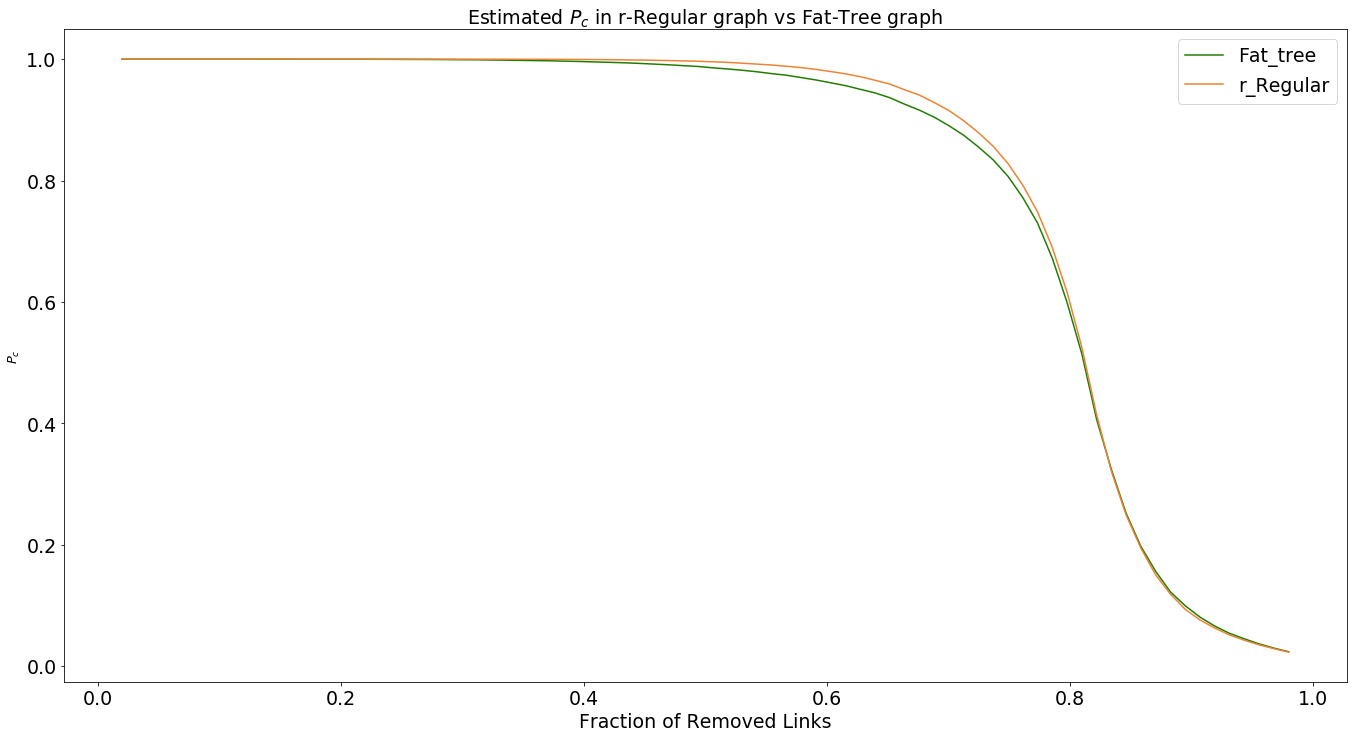

In [66]:
plt.rcParams["figure.figsize"] = (23, 12)
plt.plot(Fat_tree[1], Fat_tree[0],label = "Fat_tree", color = '#1e7d01')
plt.plot(R_regular[1], R_regular[0],label = "r_Regular", color = '#eb8334')
plt.title('Estimated ' + r'$P_c$' + ' in r-Regular graph vs Fat-Tree graph', fontsize = 19)
plt.ylabel(r'$P_c$', fontsize = 13)
plt.xlabel('Fraction of Removed Links', fontsize = 19)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.legend(fontsize = 19)
plt.savefig('Test.png')
plt.show()